In [14]:
#importing the required libraries

import pandas
from pandas_datareader import data as pdr
import yfinance as yf
import datetime
from datetime import date, timedelta

In [154]:
stock = input("Enter the ticker of the stock: ")

Enter the ticker of the stock: TSLA


In [155]:
#this will set the start date to 150 days in the past from the today's date
start = (date.today() - timedelta(150))

#end date is today's date
end = date.today()

yf.pdr_override()

#df will store the data of the input stock taken from yahoo finance with the respective start and the end date
df = pdr.get_data_yahoo(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [156]:
#print the first 5 rows of df
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-02,244.809998,254.279999,242.619995,251.600006,251.600006,123810400
2023-10-03,248.610001,250.020004,244.449997,246.529999,246.529999,101985300
2023-10-04,248.139999,261.859985,247.600006,261.160004,261.160004,129721600
2023-10-05,260.000000,263.600006,256.250000,260.049988,260.049988,119159200
2023-10-06,253.979996,261.649994,250.649994,260.529999,260.529999,117947000


In [157]:
#number of days in our time frame: 103
df.shape

(103, 6)

In [158]:
#Creating 2 new columns for the price and volume 30 day moving averages

df['Price_Moving_Avg'] = df['Adj Close'].rolling(window=30).mean()
df['Vol_Moving_Avg'] = df['Volume'].rolling(window=30).mean()

In [159]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Price_Moving_Avg,Vol_Moving_Avg
Date,,,,,,,,
2023-10-02,244.809998,254.279999,242.619995,251.600006,251.600006,123810400,NaN,NaN
2023-10-03,248.610001,250.020004,244.449997,246.529999,246.529999,101985300,NaN,NaN
2023-10-04,248.139999,261.859985,247.600006,261.160004,261.160004,129721600,NaN,NaN
2023-10-05,260.000000,263.600006,256.250000,260.049988,260.049988,119159200,NaN,NaN
2023-10-06,253.979996,261.649994,250.649994,260.529999,260.529999,117947000,NaN,NaN


The first 30 rows would be NaN values in the new columns because we cannot calculate the moving average for the first 30 days of our data. So, we will drop the rows with NaN values.

In [160]:
#removing rows with NaN values
df = df[df['Price_Moving_Avg'].notna()]

In [161]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Price_Moving_Avg,Vol_Moving_Avg
Date,,,,,,,,
2023-11-10,210.029999,215.380005,205.690002,214.649994,214.649994,130994000,231.476333,1.190475e+08
2023-11-13,215.600006,225.399994,211.610001,223.710007,223.710007,140447600,230.546666,1.196021e+08
2023-11-14,235.029999,238.139999,230.720001,237.410004,237.410004,149771600,230.242666,1.211950e+08
2023-11-15,239.289993,246.699997,236.449997,242.839996,242.839996,150354000,229.631999,1.218827e+08
2023-11-16,239.490005,240.880005,230.960007,233.589996,233.589996,136816800,228.749999,1.224713e+08


In [162]:
#number of days after removing NaN rows: 74
df.shape

(74, 8)

<Axes: >

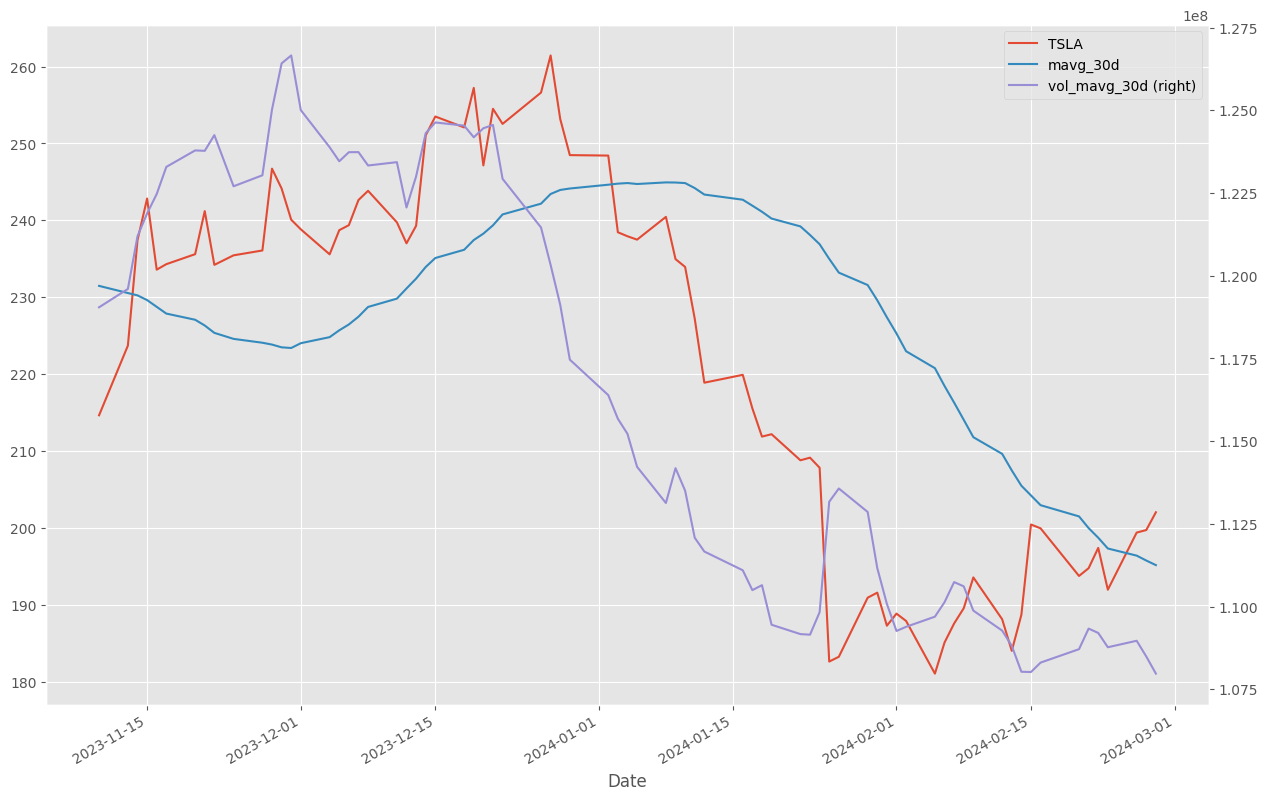

In [163]:
#plotting the adj close price, 30 days price moving average and 30 days volume moving average.
#left y axis shows the price, right y axis shows the volume and the x axis shows the date.

import matplotlib as mpl
from matplotlib import style

close_price = df['Adj Close']
pmaplot = df['Price_Moving_Avg']
vmaplot = df['Vol_Moving_Avg']

#Adjusting the size of the graph
mpl.rc('figure', figsize=(15,10))

#Adjusting the style
style.use('ggplot')

close_price.plot(label=stock, legend = True)
pmaplot.plot(label = 'mavg_30d', legend = True)
vmaplot.plot(secondary_y = True, label = 'vol_mavg_30d', legend = True)

In [164]:
#True (1) if the stock price is lower than the Price_Moving_Avg else False (0)
df['Price Lower Than Avg'] = df['Price_Moving_Avg'].gt(df['Adj Close'])

#True (1) if the stock Volume is higher than the Vol_Moving_Avg else False (0)
df['Vol Above Than Avg'] = df['Vol_Moving_Avg'].gt(df['Volume'])

<ipython-input-164-19b5ecee663a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Lower Than Avg'] = df['Price_Moving_Avg'].gt(df['Adj Close'])
<ipython-input-164-19b5ecee663a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vol Above Than Avg'] = df['Vol_Moving_Avg'].gt(df['Volume'])


In [165]:
# to see the entire dataset
print(df.to_string())

                  Open        High         Low       Close   Adj Close     Volume  Price_Moving_Avg  Vol_Moving_Avg  Price Lower Than Avg  Vol Above Than Avg
Date                                                                                                                                                         
2023-11-10  210.029999  215.380005  205.690002  214.649994  214.649994  130994000        231.476333    1.190475e+08                  True               False
2023-11-13  215.600006  225.399994  211.610001  223.710007  223.710007  140447600        230.546666    1.196021e+08                  True               False
2023-11-14  235.029999  238.139999  230.720001  237.410004  237.410004  149771600        230.242666    1.211950e+08                 False               False
2023-11-15  239.289993  246.699997  236.449997  242.839996  242.839996  150354000        229.631999    1.218827e+08                 False               False
2023-11-16  239.490005  240.880005  230.960007  233.

The data is ready to use. Before putting our money, we will backtest out momentum strategy. To do so, we can iterate through each row in our data to find our buy and sell dates and calculate the return.

Our objective is to outperform the market. So will test our strategy against the 'buy and hold' approach.

**HYPOTHESIS:**

We will buy the stock when the price is higher than the moving average and the volume is higher than the moving average. The hypothesis is that when the price and volume is rising then the momentum is bullish with a strong trend hence the price will rise.

We will sell the stock when the price hits below the moving average and the volume is still higher than the moving average. The hypothesis is that when the price hits below the moving average and the volume is still high then the momentum is bearish with a strong trend hence our speculation says that the price will decline.


In [166]:
#Declaring the Variables

#The flag variable will prevent the algorithm from executing buys consecutively without selling first.
#After each buy, z is reset to 0 and after each sell it is raised to 1.
flag = 1

PL = 0.00   #track the profit loss

start_price = float(df['Adj Close'].head(1))
end_price = float(df['Adj Close'].tail(1))

Returns = PL/start_price
Returns_per = "{:.2%}".format(Returns)

In [167]:
print("Start Price: ", start_price)
print("End Price: ", end_price)
print('\n')

#iterating through the dataframe to select our buy and sell dates based on our selected trading assumptions
for index, row in df.iterrows():
  if row['Vol Above Than Avg'] == 0 and row['Price Lower Than Avg'] == 0 and flag==1:
    print(index, row['Adj Close'], ' - BUY')
    PL = PL - row['Adj Close']
    flag = 0

  if row['Vol Above Than Avg'] == 0 and row['Price Lower Than Avg'] == 1 and flag==0:
    print(index, row['Adj Close'], ' - SELL')
    PL = PL + row['Adj Close']
    Returns = PL/start_price
    Returns_per = "{:.2%}".format(Returns)
    print("Total Profit/Loss: $", round(PL, 2))
    print("Total Returns: ", Returns_per, '\n')
    flag = 1

#this condition to check that at the end if we are still holding the stock then we should sell it on the last day.
if flag==0:
  print(index, end_price, ' - SELL')
  PL = PL + end_price
  Returns = PL/start_price
  Returns_per = "{:.2%}".format(Returns)
  print("Total Profit/Loss: $", round(PL, 2))
  print("Total Returns: ", Returns_per, '\n')

buy_hold_return = round(end_price - start_price, 2)
buy_hold_return_per = "{:.2%}".format(buy_hold_return/start_price)

print("The return with buying and holding strategy is: $", buy_hold_return, " or ", buy_hold_return_per)

Start Price:  214.64999389648438
End Price:  202.0399932861328


2023-11-14 00:00:00 237.41000366210938  - BUY
2024-01-03 00:00:00 238.4499969482422  - SELL
Total Profit/Loss: $ 1.04
Total Returns:  0.48% 

2024-02-26 00:00:00 199.39999389648438  - BUY
2024-02-28 00:00:00 202.0399932861328  - SELL
Total Profit/Loss: $ 3.68
Total Returns:  1.71% 

The return with buying and holding strategy is: $ -12.61  or  -5.87%
